## Importing the useful libraries for this analysis

In [1]:
import pandas as pd                                 # for dataframe manipulation
import matplotlib.pyplot as plt                     # for plotting the graphs
import seaborn as sns                               # for plotting the graphs
from datetime import datetime                       # for converting date into datetime format
import warnings                                     # removing the warnings
warnings.filterwarnings("ignore")
import datetime                                     # for datetime conversion


## Loading the loan dataset

In [2]:
# Data read from folder and display the sample of data

data = pd.read_csv('loan.csv',low_memory=False)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
# Printing shape, null rows and null columns count

print('Shape of Data: ',data.shape)
print('Total Null rows: ',data.isnull().all(axis=1).sum() )
print('Total Null Columns: ',(data.isna().sum()==data.shape[0]).sum() )

Shape of Data:  (39717, 111)
Total Null rows:  0
Total Null Columns:  54


## Data Cleaning

## Deleting unnecessary columns description: columns which are irrelevent

**id,member_id**: IDs are not useful as they contain the unique value for each row. <br>
**emp_title**: Employee title is not useful because almost each row is having unique value and if the industry of borrower was there we can use it to check which industry people are applying for maximum number of loans. <br>
**url**: After checking the value of URL manually we found out the only unique part in each URl is the ID which is again not useful for the analyses.<br>
**desc**: Description defines the reason of loan which we can get from purpose or title column.<br>
**zip_code**: This is not useful because if we want to analyse the data on the basis of location, it should better to use addr_state.<br>
**initial_list_status**: All rows contain the same value.<br>
**total_rec_late_fee**: Out of 39717, approx 37000 record has 0 value.<br>
**recoveries**: This column value is calculated after charge off which might not be useful.<br>
**collection_recovery_fee**: This column value is calculated after charge off which might not be useful. <br>
**last_pymnt_d**: Last month when the payment is recieved.<br>
**last_pymnt_amnt**: It totally depends on the EMI value calculated from loan amount and can be unique for almost every row.
**next_pymnt_d**: Only 2-3% of data is avilable.<br>
**last_credit_pull_d**: not required for analyses as may vary for each records.<br>
**total_rec_int**: Interest recieved till date. It depends on the loan value and can be different for each individuals.<br>
**total_rec_prncp**: Pricipal received till date. It depends on the loan value and can be different for each individuals.<br>
**policy_code**: Containing only one value '1'.<br>
**pymnt_plan**: Containing single value as 'n'.<br>
**delinq_amnt**: Containing single value as 0.<br>
**acc_now_delinq**: Containing single value as 0.<br>
**collections_12_mths_ex_med**: It describes the number of collection within 12 months excluding medical. Contains two values 0 and NA.<br>
**chargeoff_within_12_mths**: number of charge off within 12 months. Contain 0 or NA.<br>
**tax_liens**: Contain 0 or NA.<br>
**mths_since_last_record**: 36k + records having NA values.<br>
**installment**: Depends on loan amount and can be different for each individual.<br>
**funded_amnt,funded_amnt_inv**: Depends on the fund investor is having at the time of loan application.<br>
**title**: Having so many categories, so we are using purpose column instead.<br>
**mths_since_last_delinq**: Contains 25K+ null values.<br>



**Some other behaviour columns**
'application_type', 'total_pymnt', 'total_pymnt_inv', 'out_prncp_inv', 'out_prncp', 'out_prncp', 'total_acc', 'revol_bal', 'revol_util', 'pub_rec', 'open_acc', 'inq_last_6mths', 'delinq_2yrs', 'earliest_cr_line', 'Pub_rec_bankruptcies'.



## Deleting columns having all null values: Columns names

'annual_inc_joint','dti_joint','verification_status_joint','tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m',<br>'open_il_12m,,'open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util'<br>,'total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy',<br>
'bc_util','mo_sin_old_il_acct','o_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc'<br>,'mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq','num_accts_ever_120_pd','num_actv_bc_tl',<br>'num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m',<br>'num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75','tot_hi_cred_lim','total_bal_ex_mort',<br>'total_bc_limit','total_il_high_credit_limit','mths_since_last_major_derog


In [4]:
# Code for dropping columns

data_clean = data.drop(columns=['annual_inc_joint','dti_joint','verification_status_joint','tot_coll_amt','tot_cur_bal',
           'open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il',
           'il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi',
           'total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy','bc_util',
           'mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc',
           'mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq',
           'num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl',
           'num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd',
           'num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75','tot_hi_cred_lim',
           'total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit','application_type', 'total_pymnt', 
           'total_pymnt_inv', 'out_prncp_inv', 'out_prncp', 'out_prncp', 'total_acc', 'revol_bal', 'revol_util', 
           'pub_rec', 'open_acc', 'inq_last_6mths', 'delinq_2yrs', 'earliest_cr_line', 'pub_rec_bankruptcies','id','member_id',
          'emp_title','url','desc','zip_code','initial_list_status','total_rec_late_fee','recoveries','collection_recovery_fee',
          'last_pymnt_d','last_pymnt_amnt','next_pymnt_d','last_credit_pull_d','total_rec_int','total_rec_prncp','policy_code',
          'pymnt_plan','delinq_amnt','acc_now_delinq','collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens','mths_since_last_major_derog'
            ,'mths_since_last_record','installment','funded_amnt','funded_amnt_inv','title','mths_since_last_delinq'],
         axis=1)

In [5]:
# data after removing missing value columns and irrelevant columns

data_clean.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,5000,36 months,10.65%,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65
1,2500,60 months,15.27%,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00
2,2400,36 months,15.96%,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72
3,10000,36 months,13.49%,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00
4,3000,60 months,12.69%,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94


In [6]:
# data info for checking the datatype, null count and shape of dataset

data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   term                 39717 non-null  object 
 2   int_rate             39717 non-null  object 
 3   grade                39717 non-null  object 
 4   sub_grade            39717 non-null  object 
 5   emp_length           38642 non-null  object 
 6   home_ownership       39717 non-null  object 
 7   annual_inc           39717 non-null  float64
 8   verification_status  39717 non-null  object 
 9   issue_d              39717 non-null  object 
 10  loan_status          39717 non-null  object 
 11  purpose              39717 non-null  object 
 12  addr_state           39717 non-null  object 
 13  dti                  39717 non-null  float64
dtypes: float64(2), int64(1), object(11)
memory usage: 4.2+ MB


In [7]:
# removing % from int_rate column
# changing datatype of int_rate column
data_clean['int_rate'] = data_clean['int_rate'].apply(lambda x: x[0:-1])
data_clean['int_rate']  = data_clean.int_rate.astype('float64')
print('Shape of Data: ',data_clean.shape)
data_clean.head()

Shape of Data:  (39717, 14)


,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,5000,36 months,10.65,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65
1,2500,60 months,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00
2,2400,36 months,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72
3,10000,36 months,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00
4,3000,60 months,12.69,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94


In [8]:
# Converting issue_d column into datetime format

def convert_to_dt(date_time):
    format = '%b-%y'
    date = datetime.datetime.strptime(date_time, format).strftime("%Y-%m")
    return date

data_clean['issue_d']=data_clean['issue_d'].apply(lambda x: convert_to_dt(x))

data_clean.head()


,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,5000,36 months,10.65,B,B2,10+ years,RENT,24000.0,Verified,2011-12,Fully Paid,credit_card,AZ,27.65
1,2500,60 months,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12,Charged Off,car,GA,1.00
2,2400,36 months,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12,Fully Paid,small_business,IL,8.72
3,10000,36 months,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12,Fully Paid,other,CA,20.00
4,3000,60 months,12.69,B,B5,1 year,RENT,80000.0,Source Verified,2011-12,Current,other,OR,17.94


In [9]:
# Dropping data points where the loan_status is current as it not useful for study

data_loan_status_clean = data_clean[data_clean['loan_status'] != 'Current']
print('Shape of data: ', data_loan_status_clean.shape)
data_loan_status_clean.head()

Shape of data:  (38577, 14)


,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,5000,36 months,10.65,B,B2,10+ years,RENT,24000.0,Verified,2011-12,Fully Paid,credit_card,AZ,27.65
1,2500,60 months,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12,Charged Off,car,GA,1.00
2,2400,36 months,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12,Fully Paid,small_business,IL,8.72
3,10000,36 months,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12,Fully Paid,other,CA,20.00
5,5000,36 months,7.90,A,A4,3 years,RENT,36000.0,Source Verified,2011-12,Fully Paid,wedding,AZ,11.20


### Removing outliers 

In [10]:
# outlier dealing for annual income

data_loan_status_clean.describe()

,loan_amnt,int_rate,annual_inc,dti
count,38577.000000,38577.000000,3.857700e+04,38577.000000
mean,11047.025430,11.932219,6.877797e+04,13.272727
std,7348.441646,3.691327,6.421868e+04,6.673044
min,500.000000,5.420000,4.000000e+03,0.000000
25%,5300.000000,8.940000,4.000000e+04,8.130000
50%,9600.000000,11.710000,5.886800e+04,13.370000
75%,15000.000000,14.380000,8.200000e+04,18.560000
max,35000.000000,24.400000,6.000000e+06,29.990000


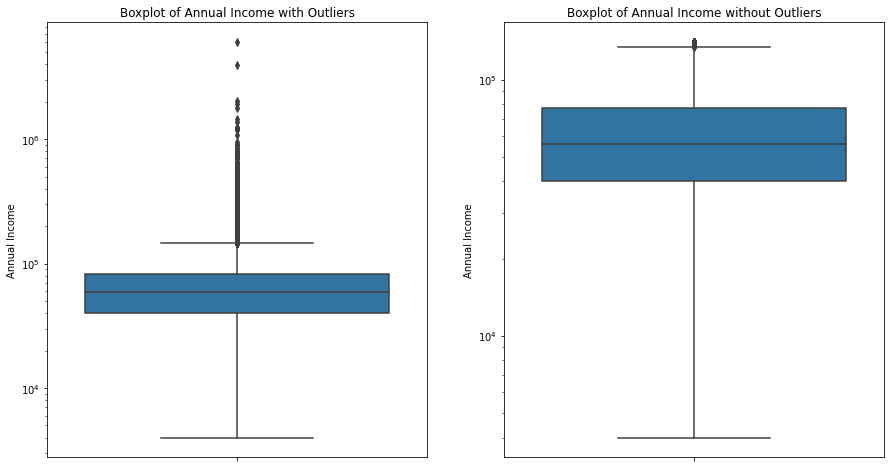

In [11]:
# outlier dealing for annual income

fig , axes = plt.subplots(1,2,figsize=(15,8))
fig.subplots_adjust(hspace=.3)

boxplot_with_outlier = sns.boxplot(data=data_loan_status_clean,  y = 'annual_inc', ax= axes[0])
boxplot_with_outlier.set_title('Boxplot of Annual Income with Outliers')
boxplot_with_outlier.set_ylabel('Annual Income')
boxplot_with_outlier.set(yscale = 'log')


# outlier are those whose values are falling after .95 percentile
outliers = data_loan_status_clean['annual_inc'].quantile(.95)
data_loan_status_clean = data_loan_status_clean[data_loan_status_clean['annual_inc'] < outliers]
# print(data_loan_status_clean.shape)

boxplot_without_outlier = sns.boxplot(data=data_loan_status_clean,  y = 'annual_inc', ax = axes[1])
boxplot_without_outlier.set_title('Boxplot of Annual Income without Outliers')
boxplot_without_outlier.set_ylabel('Annual Income')
boxplot_without_outlier.set(yscale = 'log')
plt.show()

In [12]:
# data shape after dropping outliers of annual income

data_loan_status_clean.shape

(36642, 14)

### Univariate Analysis on Continuous variables

In [13]:
# creating function for showing all Continuous variables distributions

def show_dist_plot(data,col):
    plt.figure(figsize=(8,8))
    sns.distplot(data_loan_status_clean[col])
    plt.grid()
    plt.xlabel(col, fontdict={'fontsize': 20, 'fontweight' : 20})
    plt.ylabel('density', fontdict={'fontsize': 20, 'fontweight' : 20})

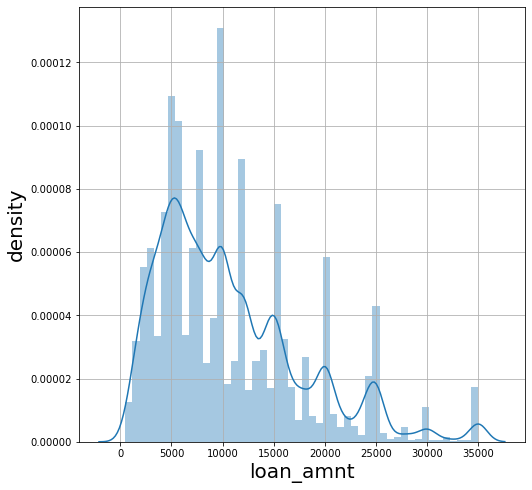

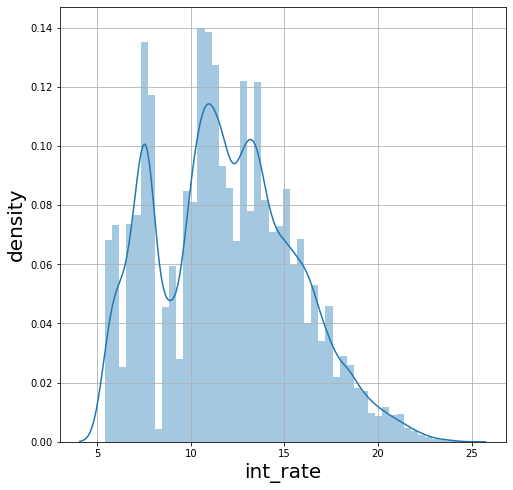

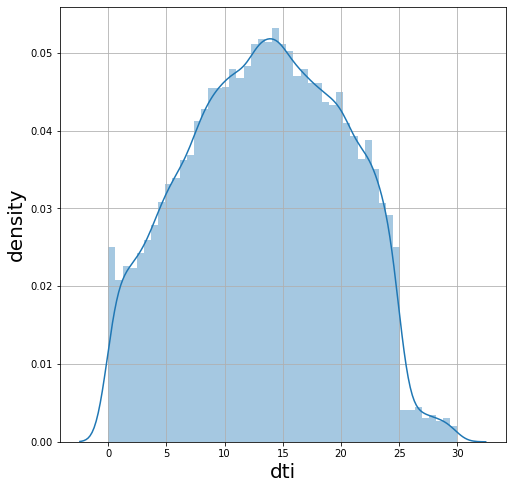

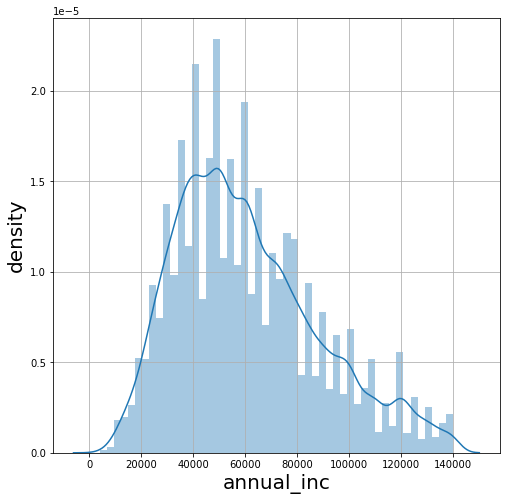

In [14]:
col_list = ['loan_amnt','int_rate','dti','annual_inc']
for col in col_list:
    show_dist_plot(data_loan_status_clean,col)
    plt.show()
    

### Insights from above plots for Continuous variables

**loan_amnt:** Majority of the loan amount lies between 4000 to 12000 <br>
**int_rate:** Majority of the loan interest rate lies in the range 10% to 15% <br>
**dti:** Majority of the dti lies between 4 to 24 <br>
**annual_inc:** The annual income of majority of the borrowers are in the range 30000 to 80000 <br>

### Univariate Analysis on Categorical variables

In [15]:
# function for showing all Categorical variables distributions

def show_count_plot(data,col):
    plt.figure(figsize=(15,10))
    sns.countplot(data=data,x=col,hue=col,dodge=False,order=data[col].value_counts().index)
    plt.xlabel(col,fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})
    plt.ylabel('Count',fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})
    

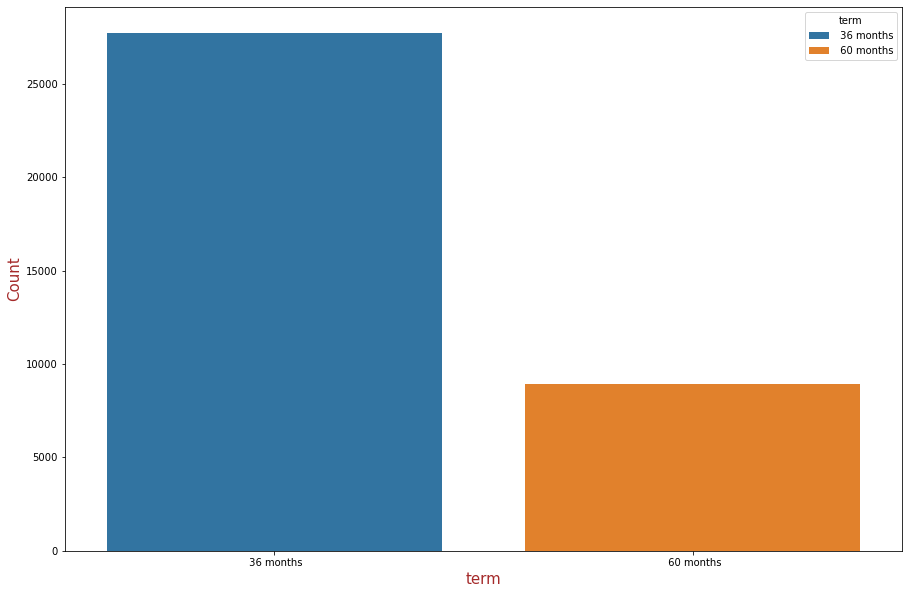

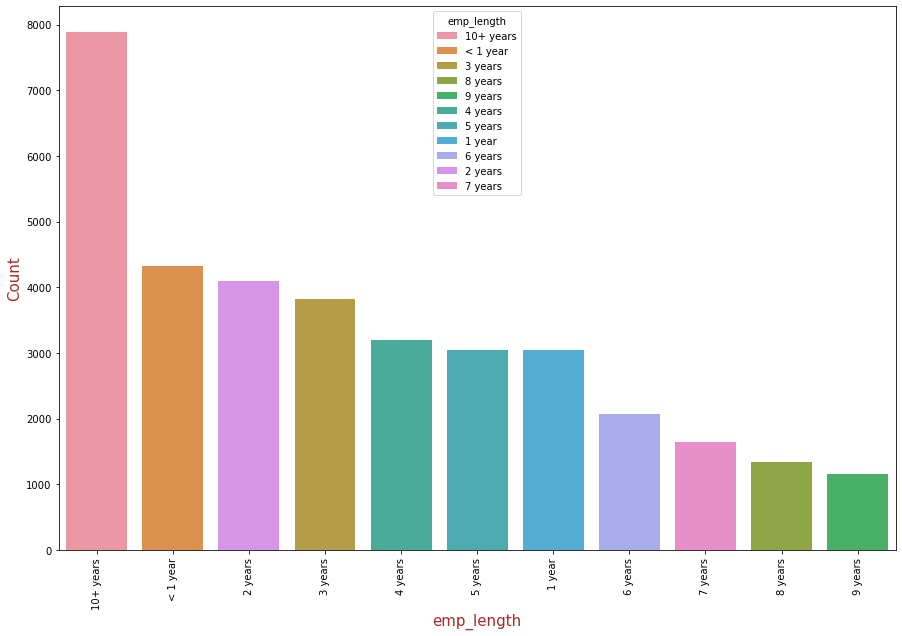

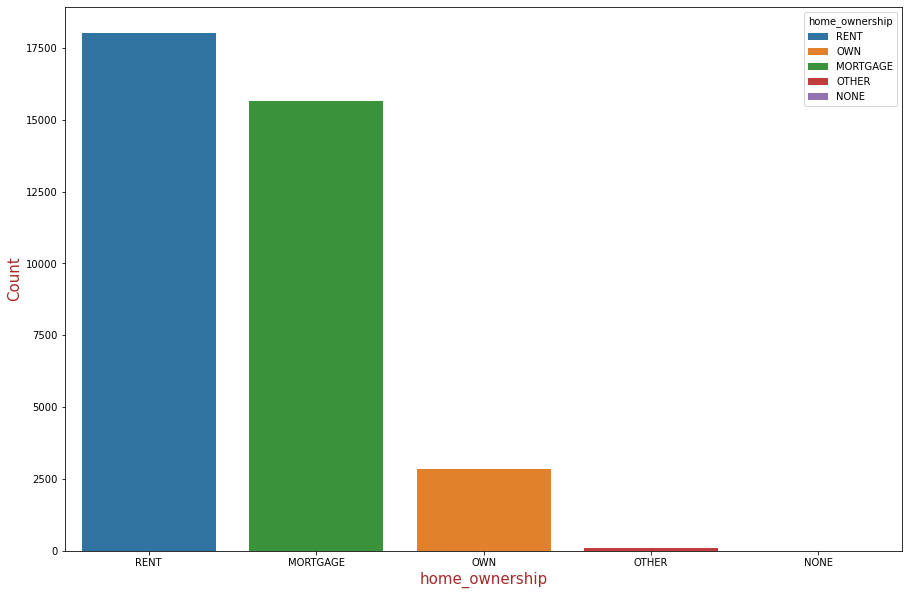

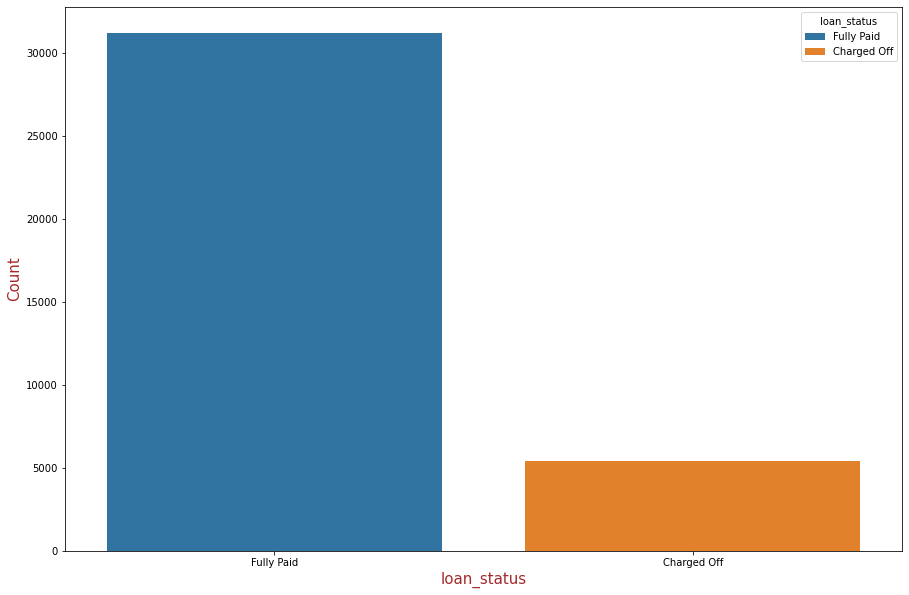

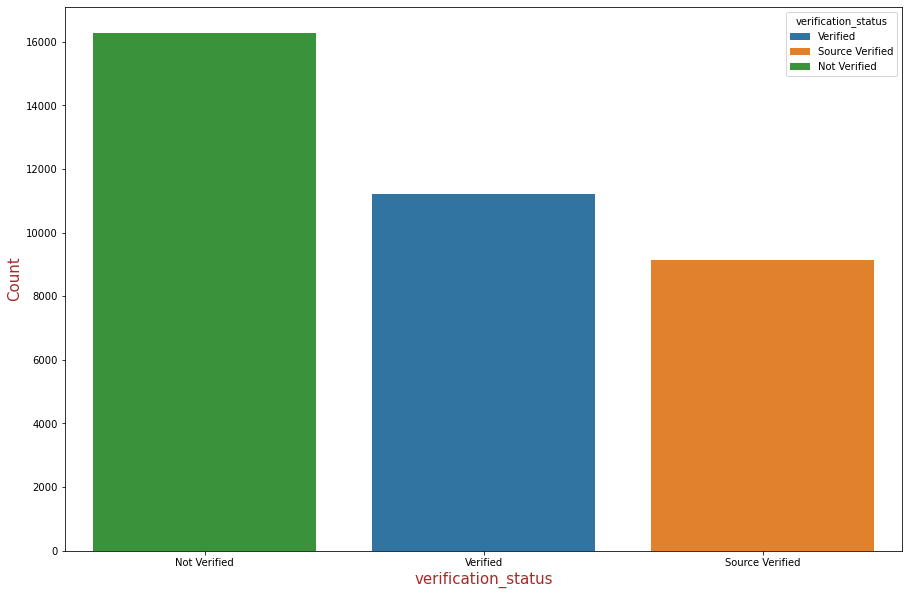

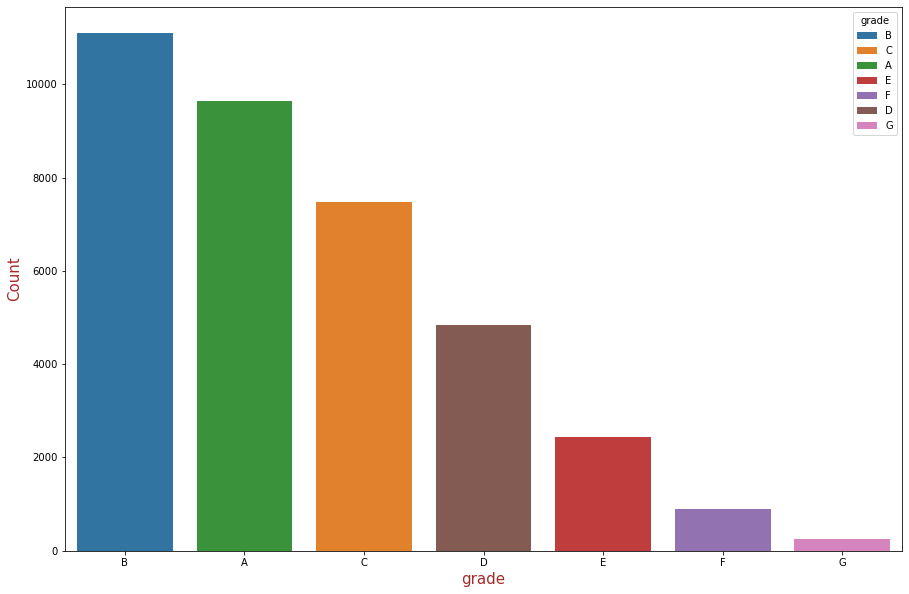

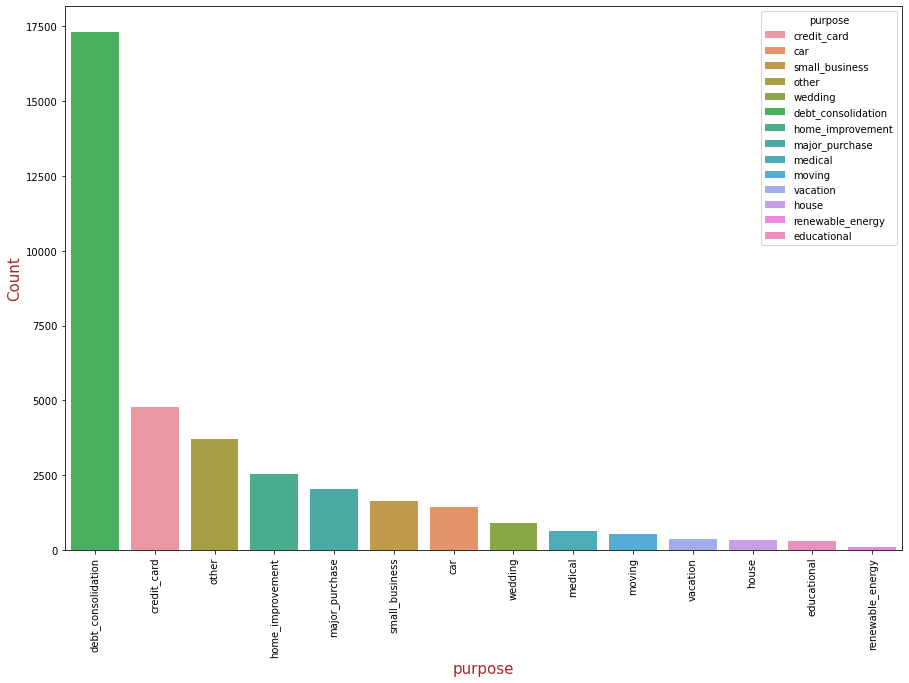

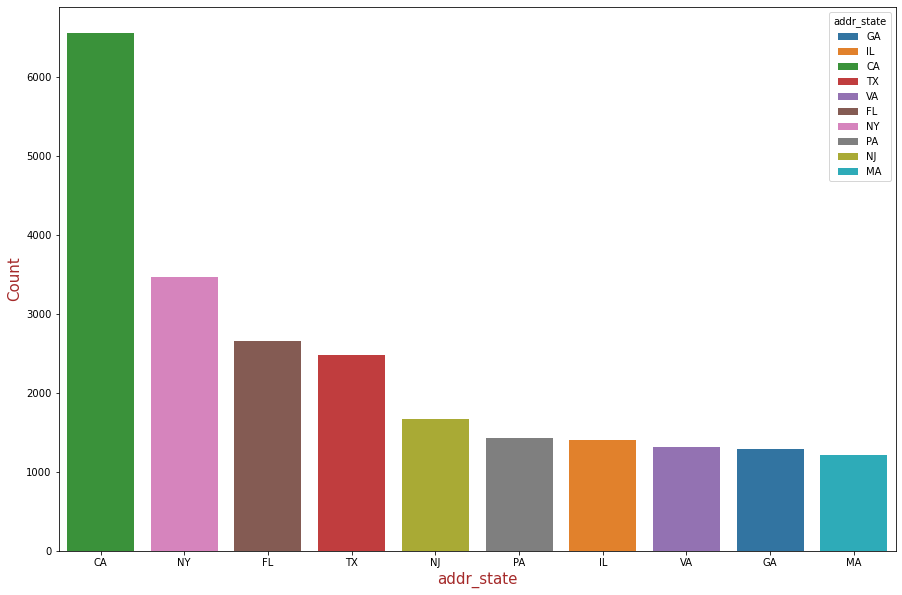

In [16]:
col2_list = ['term','emp_length','home_ownership','loan_status','verification_status',
             'grade','purpose','addr_state']
for col in col2_list:
    if col=='purpose' or col=='emp_length':
        show_count_plot(data_loan_status_clean,col)
        plt.xticks(rotation=90)
    elif col=='addr_state':
        top_list = data_loan_status_clean[col].value_counts().head(10).index.tolist()
        inter_data = data_loan_status_clean[data_loan_status_clean[col].isin(top_list)]
        show_count_plot(inter_data,col)  
    else:
        show_count_plot(data_loan_status_clean,col)
    plt.show()

### Insights from above plots for categorical variables

**term:** Majority of the borrowers prefer to choose term of 36 months (29000) whereas less borrowers opt for 60 months (10000) <br>
**emp_length:** Number of years of Employment for majority of the borrowers are 10+ years (~ 8900) <br>
**home_ownership:** Majority of the borrowers live in a Rented home 18900 whereas 17600 borrowers have a Mortgage on their             property <br>
**loan_status:** Majority of the loan status is Fully paid (33000) whereas very less borrowers have a status as Charged off (5600) <br>
**verification_status:** Majority of the borrower's income is Not Verified (~16930) <br>
**grade:** Most of the borrowers are categorised under Grade B (12020) whereas least are categorised as Grade G (316) <br>
**purpose:** The purpose of applying loan for majority of the borrowers is dept consolidation (18641) followed by credit card (5130). <br>
**addr_state:** Majority of the borrowers applying for loan are from California state (7099) <br> 

## Segmented Univariated Analysis on Categorical Variables

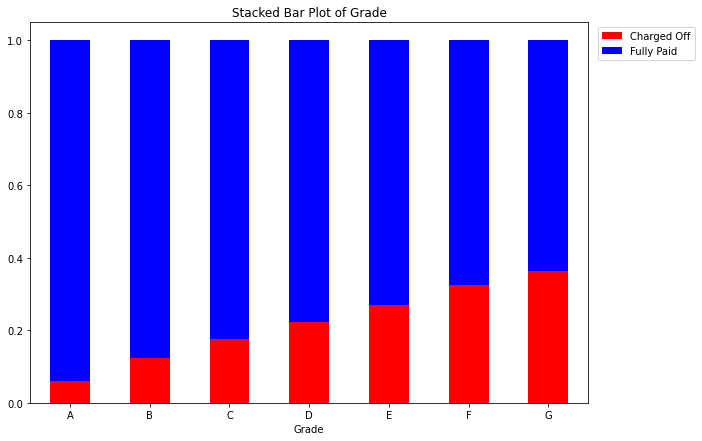

In [17]:
# Grade Vs Loan Status Stacked bar plot

data_grade = pd.crosstab(data_loan_status_clean.grade,data_loan_status_clean.loan_status,normalize='index')
data_grade.plot(kind='bar', stacked=True, figsize=[10,7],color=['red','blue'])
plt.title('Stacked Bar Plot of Grade')
plt.xlabel('Grade')
plt.legend(['Charged Off','Fully Paid'], loc = 'upper right', bbox_to_anchor=(1.2,1))
plt.xticks(rotation=360)
plt.show()

In [18]:
data_grade*100

loan_status,Charged Off,Fully Paid
grade,,
A,6.149539,93.850461
B,12.400865,87.599135
C,17.707637,82.292363
D,22.341746,77.658254
E,26.952965,73.047035
F,32.618510,67.381490
G,36.398467,63.601533


**Insight**
1. We can see from the above graph that the Grade A less prone to Defaulters.
2. Going forward from A to G the rate of defaulters are increasing. 

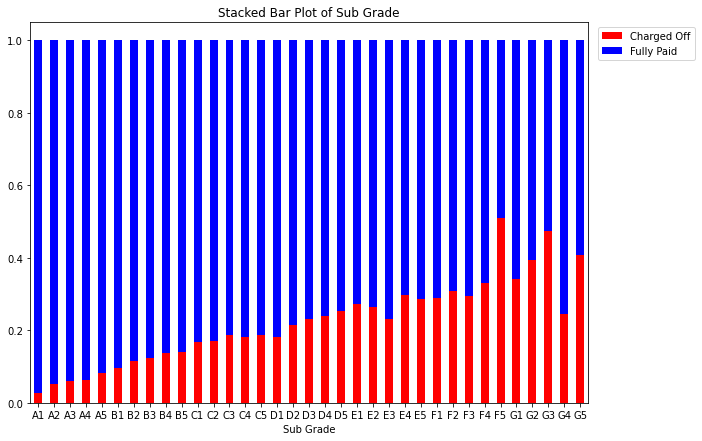

In [19]:
# Sub Grade Vs Loan Status Stacked bar plot

data_subgrade = pd.crosstab(data_loan_status_clean.sub_grade,data_loan_status_clean.loan_status,normalize='index')
data_subgrade.plot(kind='bar', stacked=True, figsize=[10,7],color=['red','blue'])
plt.title('Stacked Bar Plot of Sub Grade')
plt.xlabel('Sub Grade')
plt.legend(['Charged Off','Fully Paid'], loc = 'upper right', bbox_to_anchor=(1.2,1))
plt.xticks(rotation=360)
plt.show()

In [20]:
data_subgrade.tail(10)*100

loan_status,Charged Off,Fully Paid
sub_grade,,
F1,28.985507,71.014493
F2,30.875576,69.124424
F3,29.487179,70.512821
F4,33.093525,66.906475
F5,51.020408,48.979592
G1,34.090909,65.909091
G2,39.393939,60.606061
G3,47.500000,52.500000
G4,24.444444,75.555556


**Insight**: As we can see G3, G5, F5 is more prone to defaulters

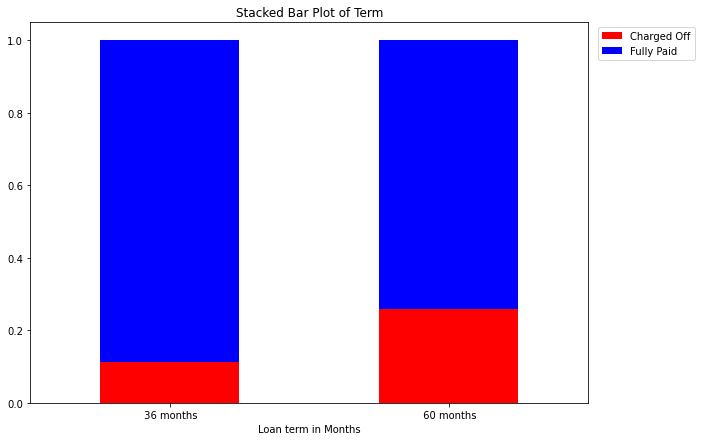

In [21]:
# Term Vs Loan Status Stacked bar plot

data_term = pd.crosstab(data_loan_status_clean.term,data_loan_status_clean.loan_status,normalize='index')
data_term.plot(kind='bar', stacked=True, figsize=[10,7],color=['red','blue'])
plt.title('Stacked Bar Plot of Term')
plt.xlabel('Loan term in Months')
plt.legend(['Charged Off','Fully Paid'], loc = 'upper right', bbox_to_anchor=(1.2,1))
plt.xticks(rotation=360)
plt.show()

In [22]:
data_term*100

loan_status,Charged Off,Fully Paid
term,,
36 months,11.232590,88.767410
60 months,25.795251,74.204749


**Insight**: We can see from the above plot that the 60 months loan term is more prone to charge off.

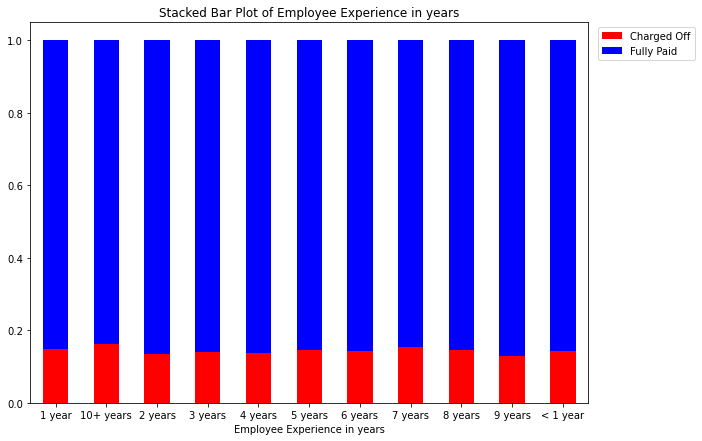

In [23]:
# Employee length Vs Loan Status Stacked bar plot

data_emp_length = pd.crosstab(data_loan_status_clean.emp_length,data_loan_status_clean.loan_status,normalize='index')
data_emp_length.plot(kind='bar', stacked=True, figsize=[10,7],color=['red','blue'])
plt.title('Stacked Bar Plot of Employee Experience in years')
plt.xlabel('Employee Experience in years')
plt.legend(['Charged Off','Fully Paid'], loc = 'upper right', bbox_to_anchor=(1.2,1))
plt.xticks(rotation=360)
plt.show()

In [24]:
data_emp_length*100

loan_status,Charged Off,Fully Paid
emp_length,,
1 year,14.755176,85.244824
10+ years,16.095890,83.904110
2 years,13.338210,86.661790
3 years,14.020403,85.979597
4 years,13.856741,86.143259
5 years,14.487516,85.512484
6 years,14.182344,85.817656
7 years,15.337797,84.662203
8 years,14.466816,85.533184


**Insight**: We can see from the above plot that there is not significant affect of no. of years of experience on loan status

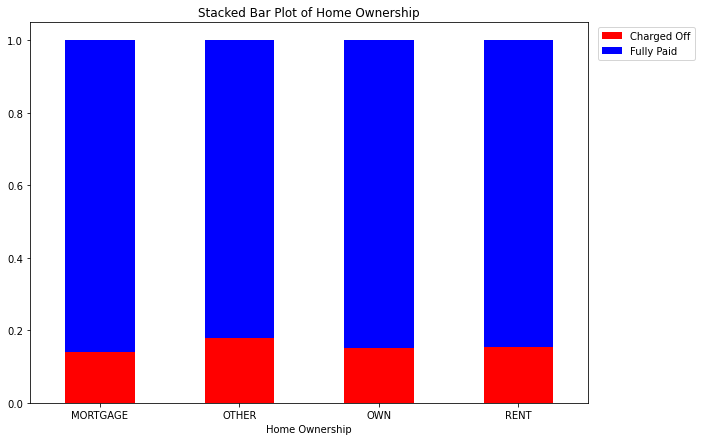

In [25]:
# Replacing none with others as it contains very few values
data_loan_status_clean['home_ownership'].replace(to_replace=['NONE'],value='OTHER', inplace = True)

# home_ownership Vs Loan Status Stacked bar plot
data_home_ownership = pd.crosstab(data_loan_status_clean.home_ownership,data_loan_status_clean.loan_status,normalize='index')
data_home_ownership.plot(kind='bar', stacked=True, figsize=[10,7],color=['red','blue'])
plt.title('Stacked Bar Plot of Home Ownership')
plt.xlabel('Home Ownership')
plt.legend(['Charged Off','Fully Paid'], loc = 'upper right', bbox_to_anchor=(1.2,1))
plt.xticks(rotation=360)
plt.show()

In [26]:
data_home_ownership*100

loan_status,Charged Off,Fully Paid
home_ownership,,
MORTGAGE,13.992085,86.007915
OTHER,17.894737,82.105263
OWN,15.217391,84.782609
RENT,15.380775,84.619225


**Insight**: We can see from the above plot that 'OTHER' category is more prone to charge off but we cannot comment on that as the 'OTHER' category is not defined properly.

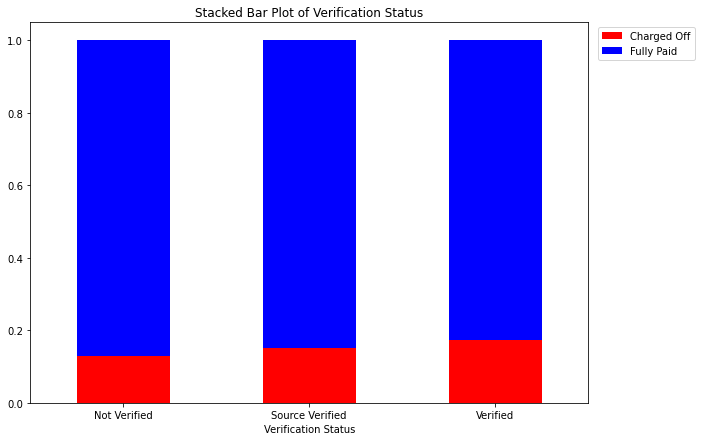

In [27]:
# Verfication status Stacked bar plot

data_verification_status = pd.crosstab(data_loan_status_clean.verification_status,
                                       data_loan_status_clean.loan_status,normalize='index')
data_verification_status.plot(kind='bar', stacked=True, figsize=[10,7],color=['red','blue'])
plt.title('Stacked Bar Plot of Verification Status')
plt.xlabel('Verification Status')
plt.legend(['Charged Off','Fully Paid'], loc = 'upper right', bbox_to_anchor=(1.2,1))
plt.xticks(rotation=360)
plt.show()

In [28]:
data_verification_status*100

loan_status,Charged Off,Fully Paid
verification_status,,
Not Verified,12.870131,87.129869
Source Verified,15.005464,84.994536
Verified,17.371143,82.628857


**Insight**: We can see from above plot that the verified loans are more prone to defaulters.

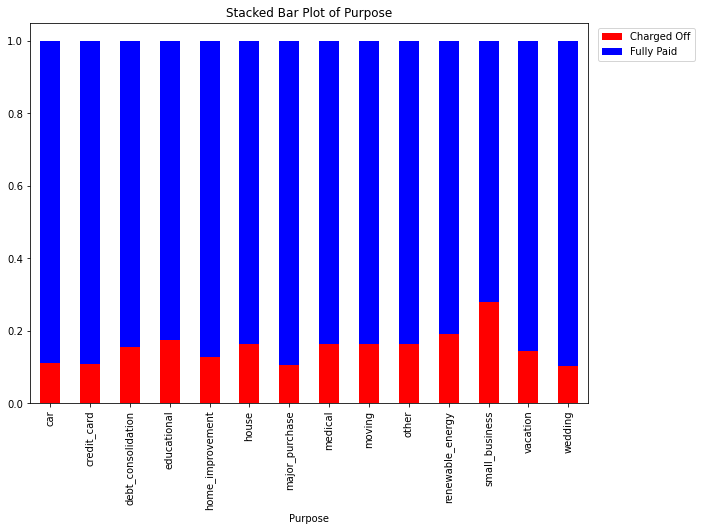

In [29]:
# Purpose Stacked bar plot

data_purpose = pd.crosstab(data_loan_status_clean.purpose,
                                       data_loan_status_clean.loan_status,normalize='index')
data_purpose.plot(kind='bar', stacked=True, figsize=[10,7],color=['red','blue'])
plt.title('Stacked Bar Plot of Purpose')
plt.xlabel('Purpose')
plt.legend(['Charged Off','Fully Paid'], loc = 'upper right', bbox_to_anchor=(1.2,1))
plt.xticks(rotation=90)
plt.show()

In [30]:
data_purpose*100

loan_status,Charged Off,Fully Paid
purpose,,
car,10.980663,89.019337
credit_card,10.853199,89.146801
debt_consolidation,15.461534,84.538466
educational,17.307692,82.692308
home_improvement,12.602740,87.397260
house,16.272189,83.727811
major_purchase,10.611247,89.388753
medical,16.250000,83.750000
moving,16.363636,83.636364


**Insight**: We can see from above plot that the loan taken for the purpose of small business has more prone to defaulters.

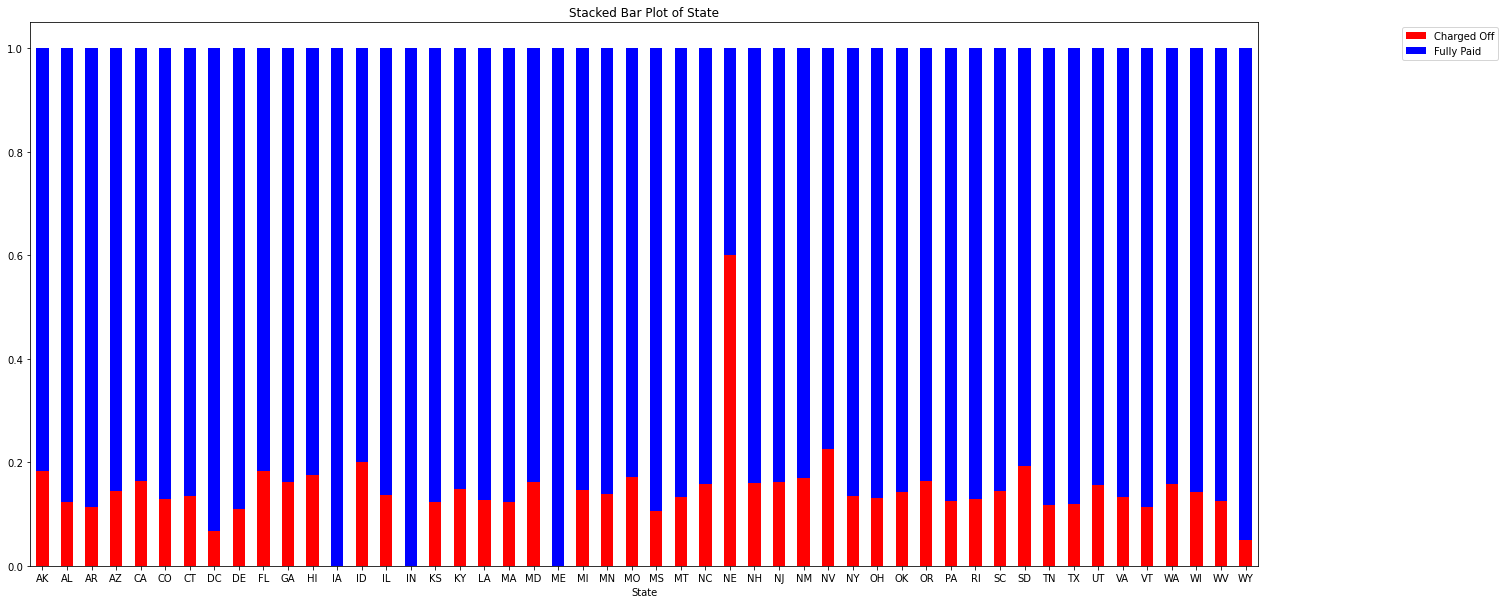

In [31]:
# State Stacked bar plot

data_state = pd.crosstab(data_loan_status_clean.addr_state,
                                       data_loan_status_clean.loan_status,normalize='index')
data_state.plot(kind='bar', stacked=True, figsize=[22,10],color=['red','blue'])
plt.title('Stacked Bar Plot of State')
plt.xlabel('State')
plt.legend(['Charged Off','Fully Paid'], loc = 'upper right', bbox_to_anchor=(1.2,1))
plt.xticks(rotation=360)
plt.show()

In [32]:
data_state.sort_values(by=['Charged Off'], inplace=True)
data_state.tail(10)*100

loan_status,Charged Off,Fully Paid
addr_state,,
CA,16.356707,83.643293
NM,16.949153,83.050847
MO,17.156105,82.843895
HI,17.500000,82.500000
FL,18.288084,81.711916
AK,18.309859,81.690141
SD,19.354839,80.645161
ID,20.000000,80.000000
NV,22.538293,77.461707


**Insight**: We can see from above plot that Nebraska (NE) state borrowers are more prone to defaulters

## Segmented Univariate Analysis on Continuous Variables

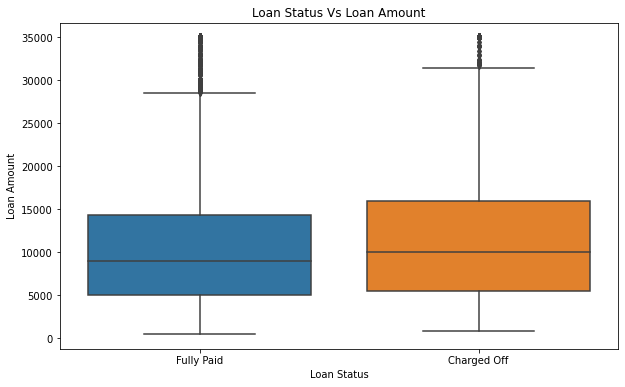

In [33]:
# Loan Amount with Loan Status

plt.figure(figsize=(10,6))
sns.boxplot(data=data_loan_status_clean,x='loan_status', y='loan_amnt')
plt.title('Loan Status Vs Loan Amount')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

In [34]:
data_loan_status_clean.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5416.0,11811.082903,7885.493497,900.0,5500.0,10000.0,16000.0,35000.0
Fully Paid,31226.0,10485.046115,6873.193921,500.0,5000.0,9000.0,14400.0,35000.0


**Insight**: We can see from the graph that higher the loan amount higher the chance of default.

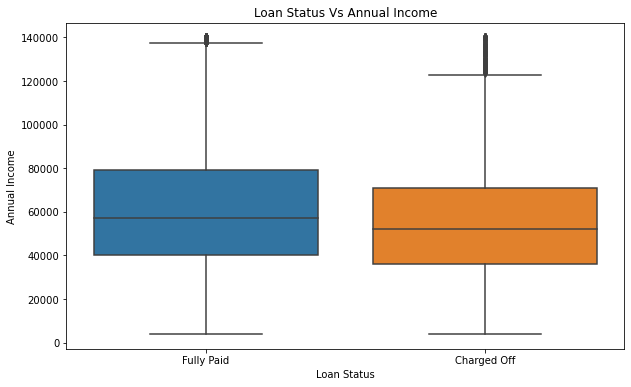

In [35]:
# Annual Income with Loan Status

plt.figure(figsize=(10,6))
sns.boxplot(data=data_loan_status_clean,x='loan_status', y='annual_inc')
plt.title('Loan Status Vs Annual Income')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.show()

In [36]:
data_loan_status_clean.groupby('loan_status')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5416.0,56410.900685,26538.396509,4080.0,36294.75,51962.0,71175.25,140000.0
Fully Paid,31226.0,61596.273419,27846.467058,4000.0,40000.00,57000.0,79000.00,140000.0


**Insight**: We can see from the plot that lower the income higher the chance of charge off.

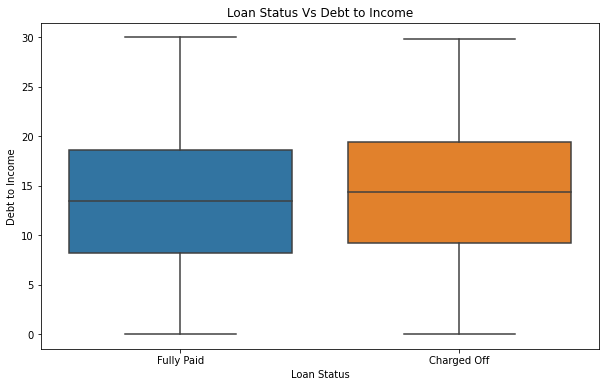

In [37]:
# Loan Status to Debt to Income

plt.figure(figsize=(10,6))
sns.boxplot(data=data_loan_status_clean,x='loan_status', y='dti')
plt.title('Loan Status Vs Debt to Income')
plt.xlabel('Loan Status')
plt.ylabel('Debt to Income')
plt.show()

In [38]:
data_loan_status_clean.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5416.0,14.107315,6.588015,0.0,9.1800,14.41,19.41,29.85
Fully Paid,31226.0,13.332772,6.667693,0.0,8.2025,13.43,18.59,29.99


**Insight**: We can see from the above boxplot that the low debt to income is slight less prone to charge off.

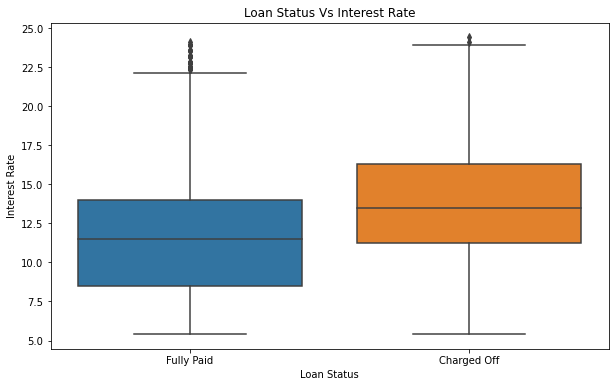

In [39]:
# Loan Status to Interest rate

plt.figure(figsize=(10,6))
sns.boxplot(data=data_loan_status_clean,x='loan_status', y='int_rate')
plt.title('Loan Status Vs Interest Rate',)
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.show()

In [40]:
data_loan_status_clean.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5416.0,13.757317,3.630979,5.42,11.26,13.49,16.32,24.40
Fully Paid,31226.0,11.563639,3.575330,5.42,8.49,11.49,13.98,24.11


**Insight**: We can see from the above boxplot that the higher interest rates are more prone to charge off loan.

## Bivariate on Continuous Variable

In [41]:
data_corr = data_loan_status_clean.copy()

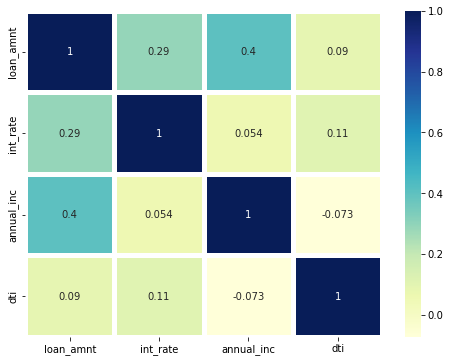

In [42]:
# Relationship between all the Continuous variables 

plt.figure(figsize = (8,6))
sns.heatmap(data_corr.corr(), cmap='YlGnBu', linewidths=5, annot=True)
plt.show()

**Insight**: Loan amount and Annual Income is positively correlated with the correlation value of .4
             Other correlation values are very small

## Bivariate on Categorical Variable

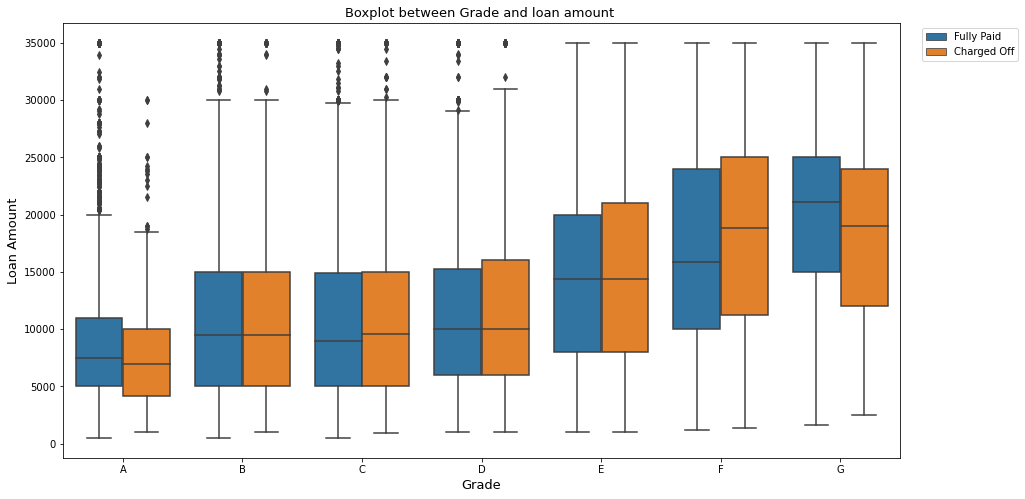

In [43]:
# boxplot between Grade to loan amount

plt.figure(figsize=(15,8))
boxplot = sns.boxplot(data=data_loan_status_clean,x = 'grade',y = 'loan_amnt', hue = 'loan_status',
                     order=['A','B','C','D','E','F','G'])
boxplot.set_title('Boxplot between Grade and loan amount ',fontdict={'fontSize':13,'fontWeight':20})
boxplot.set_xlabel('Grade', fontdict={'fontSize':13,'fontWeight':20})
boxplot.set_ylabel('Loan Amount', fontdict={'fontSize':13,'fontWeight':20})
boxplot.legend(bbox_to_anchor=(1.02,1), loc = 'upper left')
plt.show()

**Insights**: We can se from the plot that for Grade F, higher the loan amount higher are the chances of default

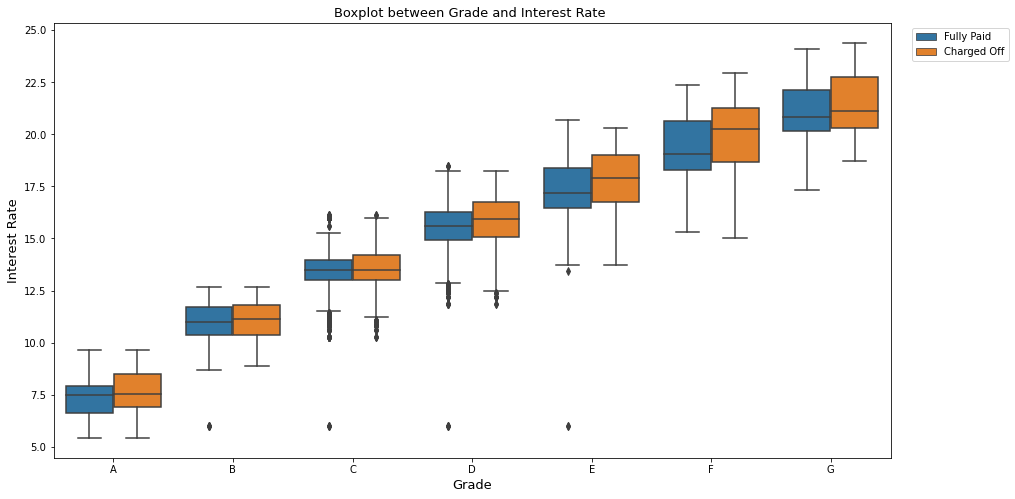

In [44]:
# boxplot between Grade to Interest Rate

plt.figure(figsize=(15,8))
boxplot = sns.boxplot(data=data_loan_status_clean,x = 'grade',y = 'int_rate', hue = 'loan_status',
                     order=['A','B','C','D','E','F','G'])
boxplot.set_title('Boxplot between Grade and Interest Rate ',fontdict={'fontSize':13,'fontWeight':20})
boxplot.set_xlabel('Grade', fontdict={'fontSize':13,'fontWeight':20})
boxplot.set_ylabel('Interest Rate', fontdict={'fontSize':13,'fontWeight':20})
boxplot.legend(bbox_to_anchor=(1.02,1), loc = 'upper left')
plt.show()


**Insights**: <br> 1.We can see as the grade is moving from A to G, the interest rate is also increasing. <br>
              2.We can see from the plot for Grade F, G, higher the interest amount, higher the chances of default.

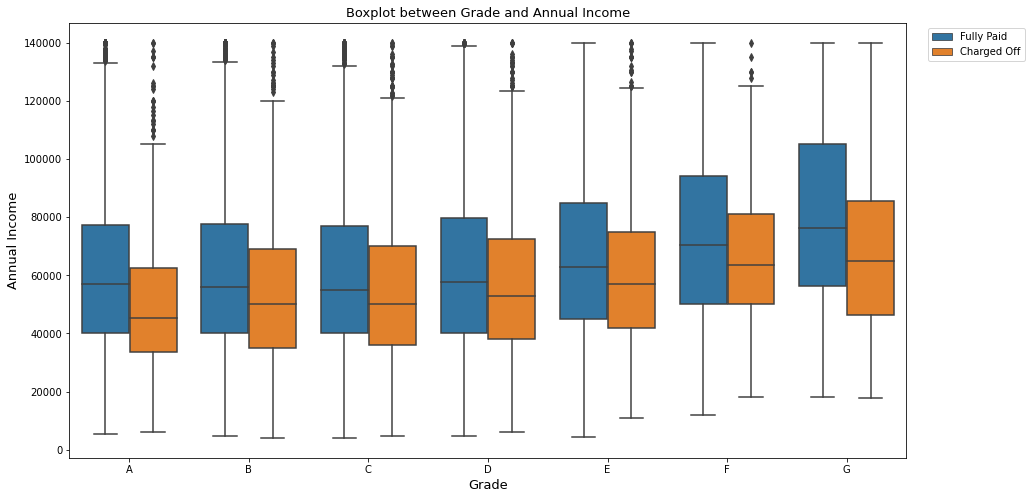

In [45]:
# boxplot between Grade to Annual Income

plt.figure(figsize=(15,8))
boxplot = sns.boxplot(data=data_loan_status_clean,x = 'grade',y = 'annual_inc', hue = 'loan_status',
                     order=['A','B','C','D','E','F','G'])
boxplot.set_title('Boxplot between Grade and Annual Income',fontdict={'fontSize':13,'fontWeight':20})
boxplot.set_xlabel('Grade', fontdict={'fontSize':13,'fontWeight':20})
boxplot.set_ylabel('Annual Income', fontdict={'fontSize':13,'fontWeight':20})
boxplot.legend(bbox_to_anchor=(1.02,1), loc = 'upper left')
plt.show()

**Insight**: We can see from the graph that the low annual income leads to charge off in each grade category.

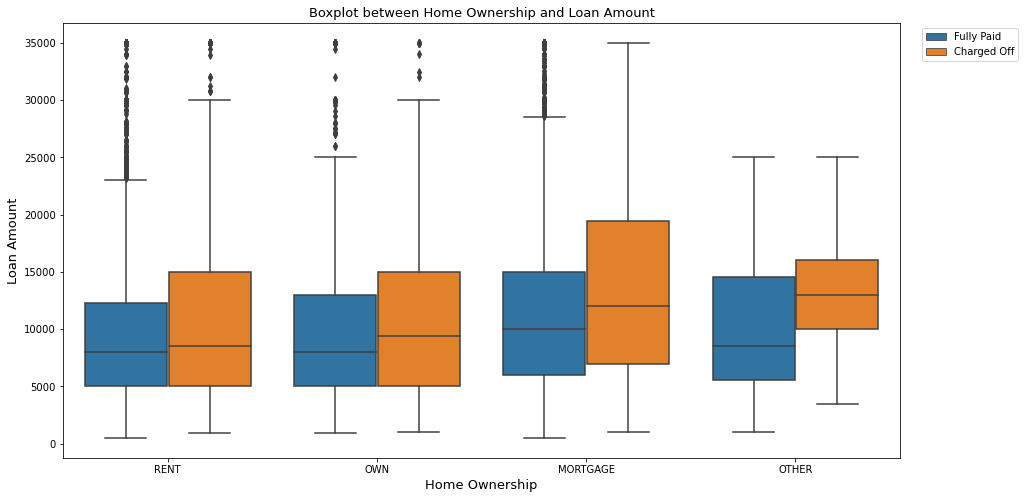

In [46]:
# boxplot between Home Ownership to Loan Amount

plt.figure(figsize=(15,8))
boxplot = sns.boxplot(data=data_loan_status_clean,x = 'home_ownership',y = 'loan_amnt', hue = 'loan_status')
boxplot.set_title('Boxplot between Home Ownership and Loan Amount',fontdict={'fontSize':13,'fontWeight':20})
boxplot.set_xlabel('Home Ownership', fontdict={'fontSize':13,'fontWeight':20})
boxplot.set_ylabel('Loan Amount', fontdict={'fontSize':13,'fontWeight':20})
boxplot.legend(bbox_to_anchor=(1.02,1), loc = 'upper left')
plt.show()

**Insight**: For Mortgage homes, higher the loan amount, higher the chances of default.

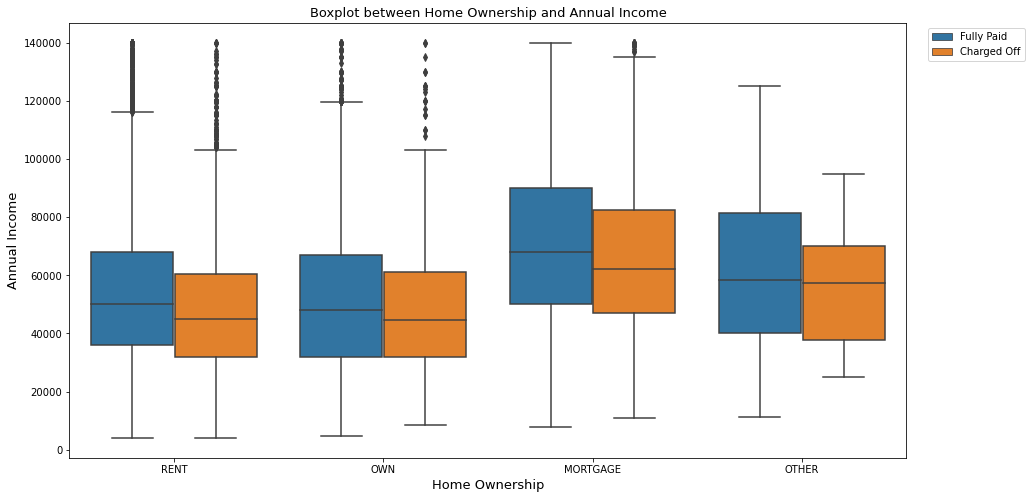

In [47]:
# boxplot between Home Ownership to Annual Income

plt.figure(figsize=(15,8))
boxplot = sns.boxplot(data=data_loan_status_clean,x = 'home_ownership',y = 'annual_inc', hue = 'loan_status')
boxplot.set_title('Boxplot between Home Ownership and Annual Income',fontdict={'fontSize':13,'fontWeight':20})
boxplot.set_xlabel('Home Ownership', fontdict={'fontSize':13,'fontWeight':20})
boxplot.set_ylabel('Annual Income', fontdict={'fontSize':13,'fontWeight':20})
boxplot.legend(bbox_to_anchor=(1.02,1), loc = 'upper left')
plt.show()

**Insight**: We cannot comment here anything as it shows same for all types ownership, lesser the income, higher the chance of default

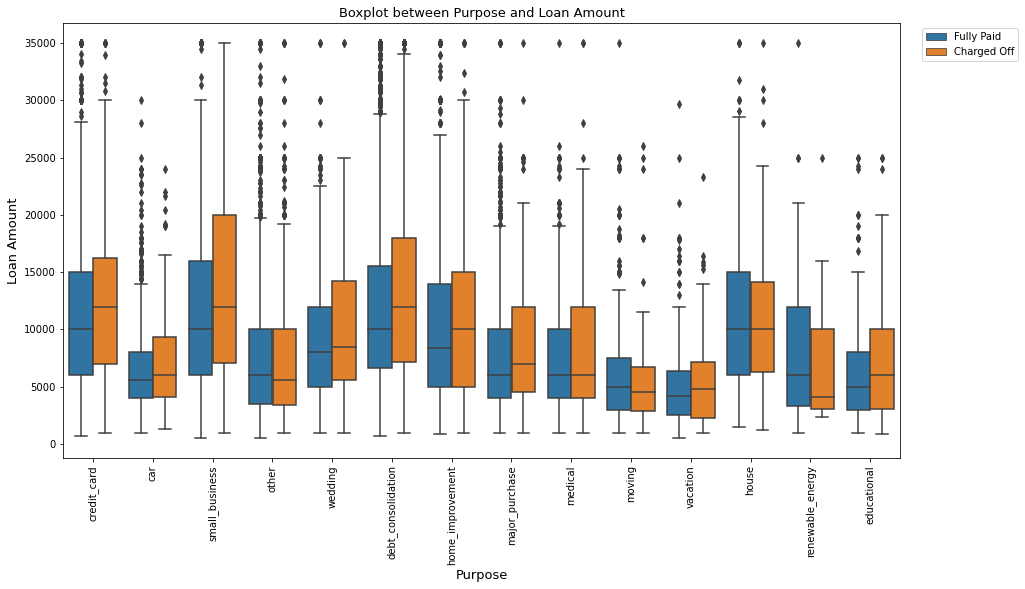

In [48]:
# boxplot between Purpose to Loan Amount

plt.figure(figsize=(15,8))
boxplot = sns.boxplot(data=data_loan_status_clean,x = 'purpose',y = 'loan_amnt', hue = 'loan_status')
boxplot.set_title('Boxplot between Purpose and Loan Amount',fontdict={'fontSize':13,'fontWeight':20})
boxplot.set_xlabel('Purpose', fontdict={'fontSize':13,'fontWeight':20})
boxplot.set_ylabel('Loan Amount', fontdict={'fontSize':13,'fontWeight':20})
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=90)
boxplot.legend(bbox_to_anchor=(1.02,1), loc = 'upper left')
plt.show()

**Insight:** We can see from the plot that for Small business, Debt consolidation and education loan if the loan amount is high. higher the chance of default.

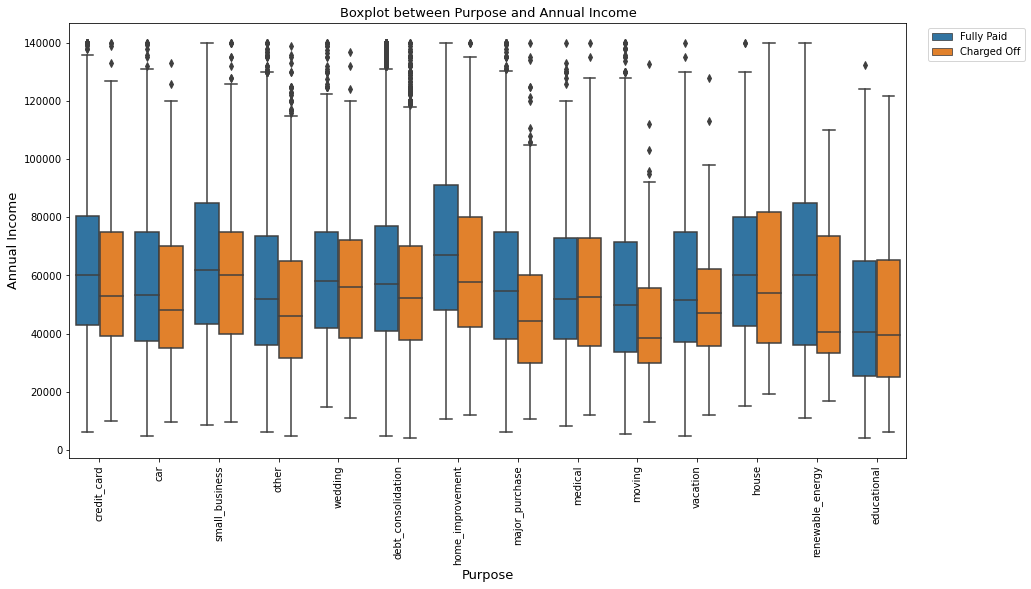

In [49]:
# boxplot between Purpose to Annual Income

plt.figure(figsize=(15,8))
boxplot = sns.boxplot(data=data_loan_status_clean,x = 'purpose',y = 'annual_inc', hue = 'loan_status')
boxplot.set_title('Boxplot between Purpose and Annual Income',fontdict={'fontSize':13,'fontWeight':20})
boxplot.set_xlabel('Purpose', fontdict={'fontSize':13,'fontWeight':20})
boxplot.set_ylabel('Annual Income', fontdict={'fontSize':13,'fontWeight':20})
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=90)
boxplot.legend(bbox_to_anchor=(1.02,1), loc = 'upper left')
plt.show()

**Insight:** We can see from the graph for the renewable energy if the annual income is low, higher the chance of default.

## Derived Matric

In [50]:
data_derived = data_loan_status_clean.copy()

In [51]:
# extracting month and year from issue date
data_derived['issue_month'] = pd.DatetimeIndex(data_derived['issue_d']).month
data_derived['issue_year'] = pd.DatetimeIndex(data_derived['issue_d']).year

# we can drop issue_d column as it is of no use now
data_derived.drop(columns=['issue_d'], axis=1, inplace=True)
data_derived.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,issue_month,issue_year
0,5000,36 months,10.65,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,12,2011
1,2500,60 months,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,12,2011
2,2400,36 months,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,12,2011
3,10000,36 months,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,12,2011
5,5000,36 months,7.90,A,A4,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding,AZ,11.20,12,2011


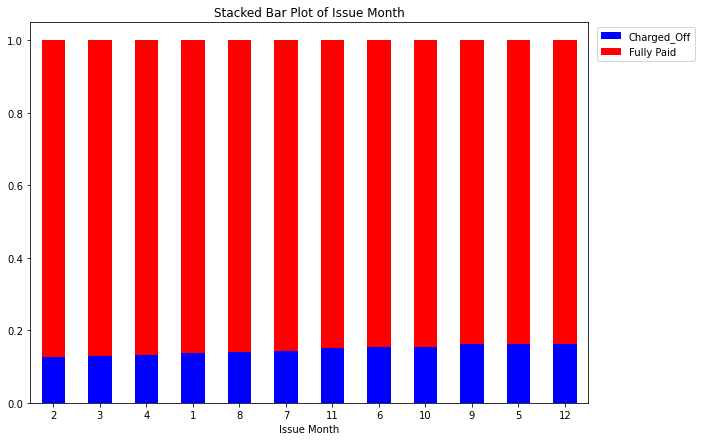

In [52]:
#Issue month stacked bar plot

data_derived = (pd.crosstab(data_derived.issue_month, data_derived.loan_status, normalize='index').sort_values(by='Charged Off'))
data_derived.plot(kind='bar', stacked=True, figsize=[10,7], color=['blue','red'])
plt.title('Stacked Bar Plot of Issue Month')
plt.xlabel('Issue Month')
plt.legend(['Charged_Off','Fully Paid'], loc='upper right', bbox_to_anchor=(1.2, 1))
plt.xticks(rotation=360)
plt.show()

In [53]:
data_derived*100

loan_status,Charged Off,Fully Paid
issue_month,,
2,12.527765,87.472235
3,12.896903,87.103097
4,13.274336,86.725664
1,13.718571,86.281429
8,14.001245,85.998755
7,14.281240,85.718760
11,15.183246,84.816754
6,15.325798,84.674202
10,15.430351,84.569649


**Insight:** The above plot shows 'December' and 'May' has the high possibility of defaulting 